# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"

# set up base url
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []
city_list = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "output_data/cities.csv"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = url + "&q=" + city # YOUR CODE HERE
        response = requests.get(city_weather).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_list.append(response["name"])
        city_lat.append(response["coord"]["lat"]) # YOUR CODE HERE
        city_lng.append(response["coord"]["lon"])  # YOUR CODE HERE
        city_max_temp.append(response["main"]["temp_max"])  # YOUR CODE HERE
        city_humidity.append(response["main"]["humidity"])  # YOUR CODE HERE
        city_clouds.append(response["clouds"]["all"])  # YOUR CODE HERE
        city_wind.append(response["wind"]["speed"])  # YOUR CODE HERE
        city_country.append(response["sys"]["country"])  # YOUR CODE HERE
        city_date.append(response["dt"])  # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | bow island
Processing Record 5 of Set 1 | gornopravdinsk
Processing Record 6 of Set 1 | raudeberg
Processing Record 7 of Set 1 | visby
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | linxia
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | adre
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | joshimath
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | gorodovikovsk
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Se

City not found. Skipping...
Processing Record 40 of Set 4 | balao
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | umm lajj
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | henties bay
Processing Record 46 of Set 4 | port-cartier
Processing Record 47 of Set 4 | lago da pedra
Processing Record 48 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 49 of Set 4 | tubruq
City not found. Skipping...
Processing Record 0 of Set 5 | hirado
Processing Record 1 of Set 5 | sandpoint
Processing Record 2 of Set 5 | fleetwood
Processing Record 3 of Set 5 | lebanon
Processing Record 4 of Set 5 | neuquen
Processing Record 5 of Set 5 | huntsville
Processing Record 6 of Set 5 | tutoia
Processing Record 7 of Set 5 | ust-nera
Processing Record 8 of Set 5 | lorengau
Processing Record 9 of Set 5 | saint-joseph
Processing Record 10 of Set 5 | ostersund
Processing Recor

Processing Record 24 of Set 8 | teocuitatlan de corona
Processing Record 25 of Set 8 | buala
Processing Record 26 of Set 8 | goderich
Processing Record 27 of Set 8 | nizhneudinsk
Processing Record 28 of Set 8 | kudat
Processing Record 29 of Set 8 | mecca
Processing Record 30 of Set 8 | porto belo
Processing Record 31 of Set 8 | diapaga
Processing Record 32 of Set 8 | djenne
Processing Record 33 of Set 8 | half moon bay
Processing Record 34 of Set 8 | teguldet
Processing Record 35 of Set 8 | tumkur
Processing Record 36 of Set 8 | ostroh
Processing Record 37 of Set 8 | brae
Processing Record 38 of Set 8 | yazman
Processing Record 39 of Set 8 | piranshahr
Processing Record 40 of Set 8 | gerede
Processing Record 41 of Set 8 | yining
Processing Record 42 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 8 | demyansk
Processing Record 44 of Set 8 | tunxi
City not found. Skipping...
Processing Record 45 of Set 8 | bajos de haina
Processing Record 46 of Set 8 | narnaul

Processing Record 16 of Set 12 | toliary
City not found. Skipping...
Processing Record 17 of Set 12 | necochea
Processing Record 18 of Set 12 | takoradi
Processing Record 19 of Set 12 | batemans bay
Processing Record 20 of Set 12 | nishihara
Processing Record 21 of Set 12 | vallenar
Processing Record 22 of Set 12 | zhezkazgan
Processing Record 23 of Set 12 | santa maria del rio
Processing Record 24 of Set 12 | nosy varika
Processing Record 25 of Set 12 | santa cruz del sur
Processing Record 26 of Set 12 | hihifo
City not found. Skipping...
Processing Record 27 of Set 12 | vanimo
Processing Record 28 of Set 12 | russell
Processing Record 29 of Set 12 | gizo
Processing Record 30 of Set 12 | tuatapere
Processing Record 31 of Set 12 | hamilton
Processing Record 32 of Set 12 | la ronge
Processing Record 33 of Set 12 | nampula
Processing Record 34 of Set 12 | beloha
Processing Record 35 of Set 12 | kralendijk
Processing Record 36 of Set 12 | mbuji-mayi
Processing Record 37 of Set 12 | abanca

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_list,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-18.69,98,56,15.50,US,1674622806
1,Arraial do Cabo,-22.9661,-42.0278,74.75,91,100,10.87,BR,1674622857
2,Longyearbyen,78.2186,15.6401,22.84,68,40,18.41,SJ,1674622858
3,Bow Island,49.8668,-111.3684,27.79,76,88,8.68,CA,1674622815
4,Gornopravdinsk,60.0500,69.9000,12.76,94,99,10.04,RU,1674622859
...,...,...,...,...,...,...,...,...,...
576,Ust'-Koksa,50.2696,85.6108,2.91,89,100,1.52,RU,1674623117
577,Boyolangu,-8.1181,111.8935,84.11,73,81,4.76,ID,1674623118
578,San Fernando del Valle de Catamarca,-28.4696,-65.7852,81.77,58,45,3.00,AR,1674623118
579,Banda Aceh,5.5577,95.3222,83.91,66,90,8.84,ID,1674623119


In [7]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.00000,581.000000,581.000000,581.000000,5.810000e+02
mean,18.912268,19.169454,49.28315,73.161790,59.074010,8.034458,1.674623e+09
std,33.973678,90.542260,31.21574,22.293605,39.205907,6.995468,1.020171e+02
min,-54.800000,-179.166700,-44.99000,1.000000,0.000000,0.000000,1.674623e+09
25%,-10.750000,-61.644200,29.30000,63.000000,18.000000,3.240000,1.674623e+09
50%,22.075200,26.150000,59.14000,78.000000,74.000000,6.260000,1.674623e+09
75%,47.804300,97.968300,74.95000,91.000000,100.000000,10.870000,1.674623e+09
max,78.218600,179.316700,100.54000,100.000000,100.000000,69.390000,1.674623e+09


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Barrow,71.2906,-156.7887,-18.69,98,56,15.50,US,1674622806
1,Arraial do Cabo,-22.9661,-42.0278,74.75,91,100,10.87,BR,1674622857
2,Longyearbyen,78.2186,15.6401,22.84,68,40,18.41,SJ,1674622858
3,Bow Island,49.8668,-111.3684,27.79,76,88,8.68,CA,1674622815
4,Gornopravdinsk,60.0500,69.9000,12.76,94,99,10.04,RU,1674622859


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

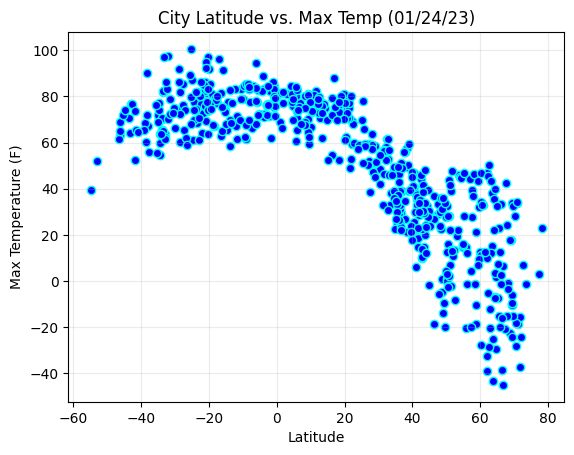

In [22]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temp (01/24/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

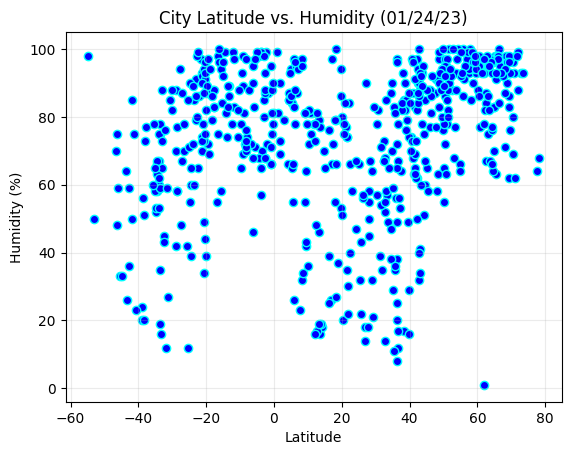

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (01/24/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

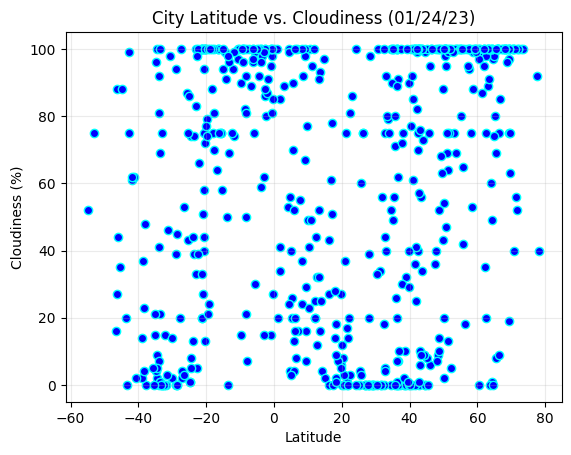

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (01/24/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

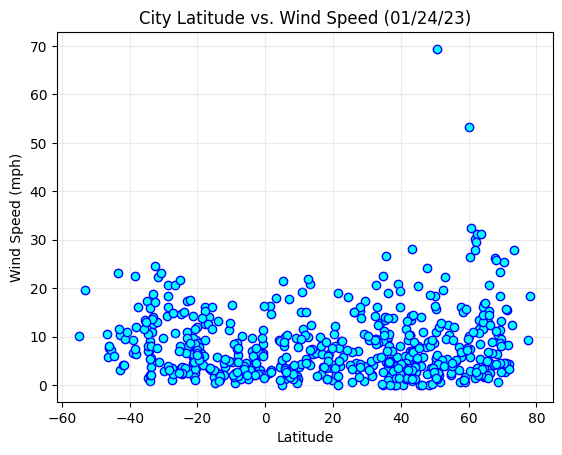

In [27]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="aqua", edgecolor="b")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (01/24/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


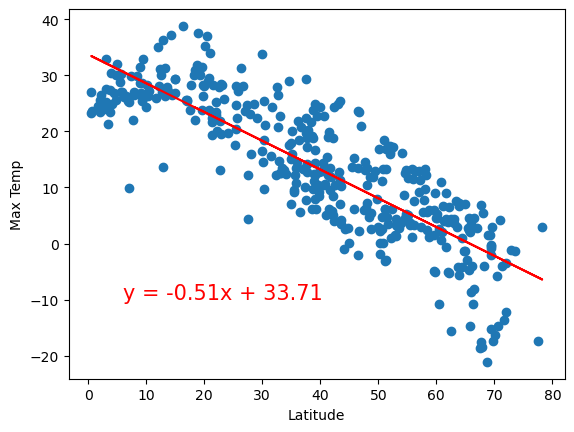

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


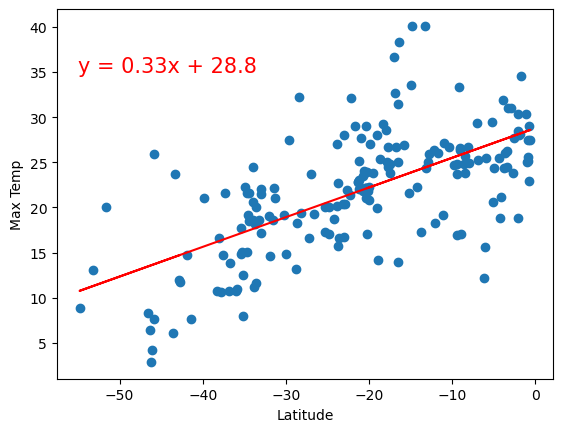

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


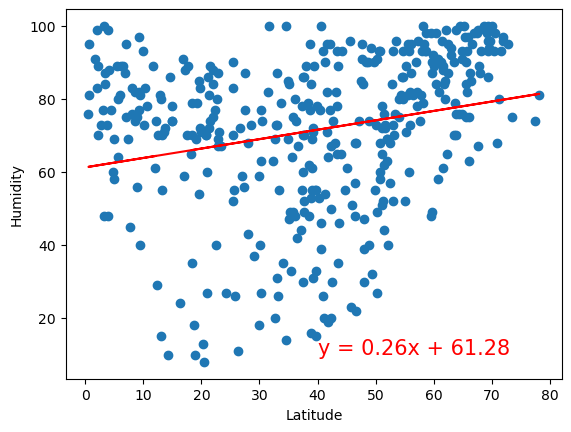

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


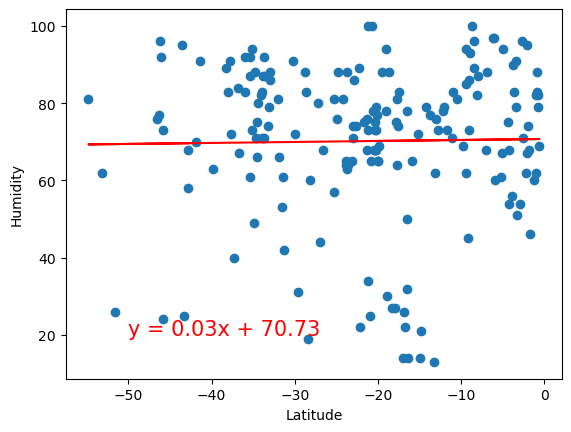

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


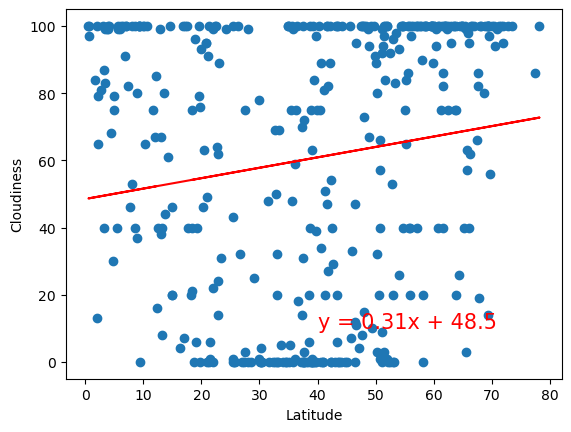

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


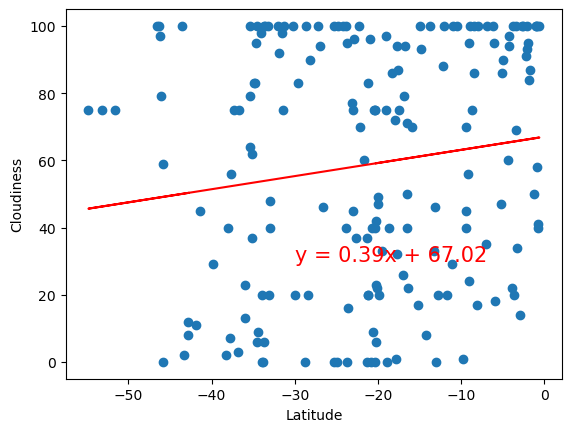

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


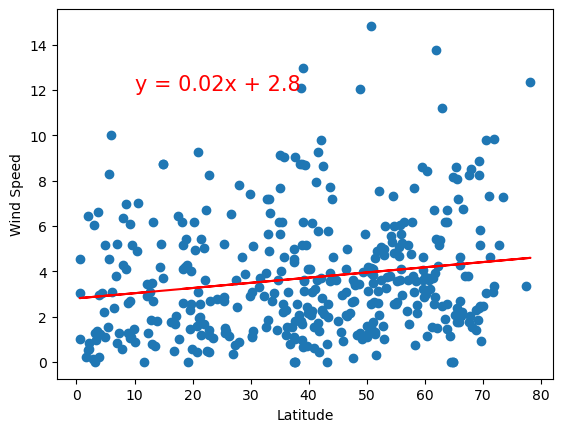

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


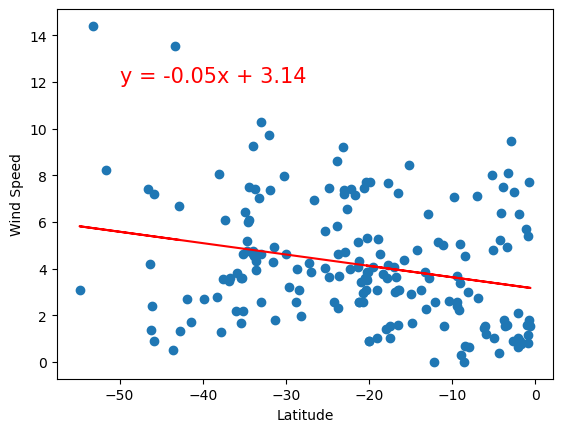

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE